<a href="https://colab.research.google.com/github/eljimenezj/-Data-modeling-techniques/blob/master/Supervised%20Learning%20in%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Aprendizaje supervisado en Python

En este caso vamos a estudiar unas aplicaciones simples de algoritmos de clasificación, regresión y algunas tecnicas de tunning para calibrar nuestros modelos machine learning. Este libro de jupyter está basado en clases tomadas de datacamp, en la cual también utilizamos una base de datos de vinos que utilizan en varias de sus clases.

Este curso hace parte del track Machine Learning Scientist with Python

# Clasificación

In [0]:
# Importamos librerias necesarias para el procesamiento y modelado
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [0]:
# Carguemos el dataset: digits
digits = datasets.load_digits()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

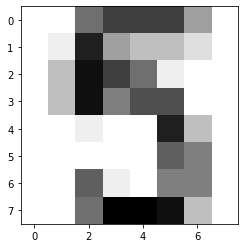

In [3]:
# Mostramos las llaves y descripción que tiene el 
print(digits.keys())
print(digits.DESCR)

# Tamaño del dataset
print(digits.images.shape)
print(digits.data.shape)

# Imprimimos la imagen
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')

In [0]:
# Creación de los arrays para el clasificador
X = digits.data
y = digits.target

# Partición del conjunto de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42, stratify=y)

In [5]:
# Instanciamos el clasificador, en este caso, vecinos mas cercanos, con 7 vecinos
knn = KNeighborsClassifier(n_neighbors=7)

# Ajustamos el modelo
knn.fit(X_train,y_train)

# Imprimir el score del modelo con los datos de testeo
print(knn.score(X_test, y_test))

0.9833333333333333


Ahora vamos a graficar el score del modelo en datos de entrenamiento y test para diferentes valores de vecinos

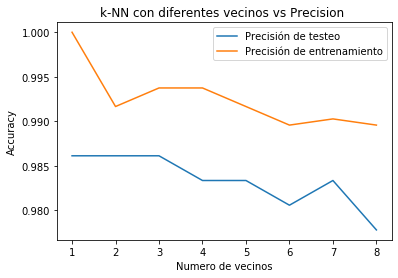

In [6]:
# Configuracion de arrays inciales 
neighbors = np.arange(1, 9) # Exploraremos vecinos entre 1 y 9 vecinos
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


# Vamos a iterar sobre los diferentes valores de vecinos y medimos el score
for i, k in enumerate(neighbors):
    # Instanciamos el clasificador
    knn = KNeighborsClassifier(n_neighbors=k)

    # Ajustamos el modelo
    knn.fit(X_train,y_train)
    
    # Medición del score en datos de train
    train_accuracy[i] = knn.score(X_train, y_train)

    # Medición del score en datos de test
    test_accuracy[i] = knn.score(X_test, y_test)

# Vamos a graficar el score
plt.title('k-NN con diferentes vecinos vs Precision ')
plt.plot(neighbors, test_accuracy, label = 'Precisión de testeo')
plt.plot(neighbors, train_accuracy, label = 'Precisión de entrenamiento')
plt.legend()
plt.xlabel('Numero de vecinos')
plt.ylabel('Accuracy')
plt.show()

# Regresión Lineal

In [0]:
# Importamos librerias necesarias para el procesamiento
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [0]:
url = 'https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv'
df = pd.read_csv(url)

In [9]:
# Exploremos el dataset rapidamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [10]:
df.describe() # Algunas estadisticas descriptivas rapidas

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [11]:
df.head() # Primeros datos del dataset

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [12]:
df.corr() # Matriz de correlacion

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


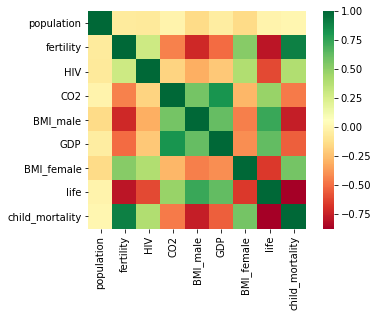

In [13]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn') # Matriz de correlacion grafica

In [0]:
# Creación de arrays para modelacion
y = df['life'].values
X = df['fertility'].values


In [15]:
# Dimensión del array X y Y antes de ajustar la forma para entrenar el modelo de regresion
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [16]:
# Ajustando la dimension de los arrays X, Y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Dimensión del array X y Y despues de ajustar la forma
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


## Cálculo regresión utilizando métrica $R^2$

In [17]:
# Instanciamos el modelo de regresion
reg = LinearRegression()

# Espacio para predicción
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Ajuste del modelo
reg.fit(X,y)

# Realizamos predicciones
y_pred = reg.predict(prediction_space)

# Score R^2 
print(reg.score(X, y))

0.6192442167740035


## Cálculo regresión utilizando métrica RSME

In [18]:

# Partición del conjunto de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Instanciamos el modelo de regresion
reg_all = LinearRegression()

# Ajuste del modelo a los datos de entrenamiento
reg_all.fit(X_train,y_train)

# Predicción utilizando datos de testeo
y_pred = reg_all.predict(X_test)

# Calculamos R^2 y RSME
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Error cuadrático medio: {}".format(rmse))

R^2: 0.7298987360907494
Error cuadrático medio: 4.194027914110243


## Introducción al Cross-validation


In [19]:
# Instanciamos el modelo de regresión
reg = LinearRegression()

# Vamos a realizar  5-fold cross-validation y vamos a medir el scores para fold
cv_scores = cross_val_score(reg,X,y, cv=5)

# Impresión del score
print(cv_scores)

print("Score Promedio del 5-Fold CV: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Score Promedio del 5-Fold CV: 0.6168819644425119


Ajustamos diferentes folds y calculamos la media del $R^2$ para cada computación


In [20]:
# Ajustamos 3-fold CV
cvscores_3 = cross_val_score(reg,X,y, cv=3)
print(np.mean(cvscores_3))

# Ajustamos 10-fold CV
cvscores_10 = cross_val_score(reg,X,y, cv=10)
print(np.mean(cvscores_10))

0.6294715754653507
0.5883937741571185


In [21]:
# Podemos observar el tiempo de ejecución al cambiar el numero de los folds

%timeit cross_val_score(reg,X,y, cv=3)
%timeit cross_val_score(reg,X,y, cv=10)

100 loops, best of 3: 3.13 ms per loop
100 loops, best of 3: 9.84 ms per loop


## Introducción a la regularización

### Lasso
Lasso regularization nos da una ayuda en el problema del feature selection, ya que **los coeficientes que tienden a cero durante el proceso de optimización no serán tenidos en cuenta y nos quedamos con aquellos que aporten a la solución del problema**

 Lasso realiza la regularización agregando a la función de pérdida un término de penalización del valor absoluto de cada coeficiente multiplicado por un alfa. Esto también se conoce como regularización L1 porque el término de regularización es la norma 1 de los coeficientes. Sin embargo, esta no es la única forma de regularizar, mas adelante veremos la regularizacion L2 o Ridge

In [0]:
## Cargaremos un nuevo dataset
url = 'https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv'
df = pd.read_csv(url)

In [0]:
# Creación de arrays para modelacion
y = df['life'].values
df = df.drop(['life','Region'],1)
X = df.values

In [24]:
# Instanciamos lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Ajustamos el modelo
lasso.fit(X,y)

# Procesamos y mostramos los coeficientes
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


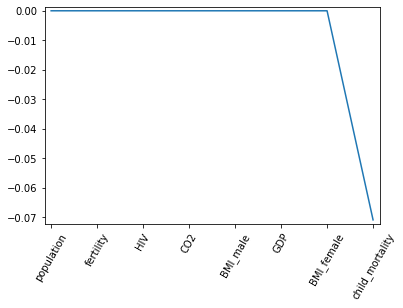

In [25]:
# Graficamos los coeficientes
plt.plot(range(len(df.columns)), lasso_coef)
plt.xticks(range(len(df.columns)), df.columns.values, rotation=60)
plt.margins(0.02)
plt.show()


### Ridge

Regularización  II: Ridge

"Lasso es ideal para la selección de características, pero al construir modelos de regresión, la regresión de Ridge por donde iniciemos."

 Ridge toma la suma de los valores al cuadrado de los coeficientes multiplicados por un alfa, como en la regresión de Ridge, se esta calculando la norma 2. 
 
 En este ejercicio, se realiza el ajuste de modelos de regresión en un rango de alfa diferentes y graficamos puntajes R2 con validación cruzada para cada uno.

 Se utilizará una función que fue dada en la clase

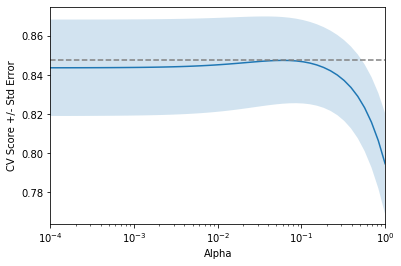

In [26]:
# Configuracion de arrays inciales 
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Instanciamos el regresor Ridge
ridge = Ridge(normalize = True)

# Vamos a iterar sobre los diferentes valores de alpha del regresor medimos el score
for alpha in alpha_space:

    #  Especificamos el valor de alfa mediente ridge.alpha
    ridge.alpha = alpha
    
    # Realizamos cross validation con 10-fold  y el ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Agregamos el valor medio del score de cada fold al array ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Agregamos la desviacion estandar cada fold al array al ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))


## Definimos funcion de graficación
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(10)
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Mostramos el grafico the plot
display_plot(ridge_scores, ridge_scores_std)


# Fine-tuning your model

* Matriz de confusión
* Precisión
* Recall
* F1 Score
*  Regresión logistica y curva ROC
* AUC (Area under curve)

In [0]:
# Cargamos un nuevo data set para esta sección
url = 'https://assets.datacamp.com/production/repositories/628/datasets/444cdbf175d5fbf564b564bd36ac21740627a834/diabetes.csv'
df = pd.read_csv(url)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
# Creación de arrays para modelacion
y = df['diabetes'].values
df = df.drop('diabetes',1)
X = df.values

Caso de predicción de spam de correos electronicos:
* Precision : Un alto indicador de precisión significa un bajo indicador de falsos positivos. O en el caso de estudio significa que no muchos correos reales fueron clasificados como spam. También es conocido como valor predictivo positivo (VPP)

* Recall: Un alto indicador de recall significa que el clasificador pronosticò mas positivos, en el caso de estudio, clasifico mas correos de spam correctamente.

En conclusión, un alto valor de precisión significa resultados más relevantes que los irrelevantes, mientras que un alto de recall significa que mayoría de los resultados son relevantes.

In [30]:
# Importando las librerias a utilizar
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

# Partición del data set en train y test con 40% de validacion
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=42 )

# Instanciamos el clasificador kNN con 6 vecinos
knn = KNeighborsClassifier(n_neighbors=6)

# Ajustamos el clasificador a los datos de entrenamiento
knn.fit(X_train,y_train)

# Pronosticamos la existencia de diabetes en X_test y lo llamamos y_pred
y_pred = knn.predict(X_test)

# Construimos la matriz de confusión 
print(confusion_matrix(y_test, y_pred)) # Primero los datos reales y luegos los pronosticados por el modelo

# Construimos el reporte de clasificación con las otras metricas (Precision, Recall y F1)
print(classification_report(y_test, y_pred)) # Primero los datos reales y luegos los pronosticados por el modelo

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



Construyendo un modelo de clasificación mediante regresión logistica

In [31]:
# Importando las librerias a utilizar
from sklearn.linear_model import LogisticRegression

# Instanciamos el clasificador de regresion logistica
logreg = LogisticRegression()

# Ajustamos el clasificador a los datos de entrenamiento
logreg.fit(X_train,y_train) # Utilizamos el mismo set de entrenamiento del clasificador de kNN

# Pronosticamos la existencia de diabetes en X_test y lo llamamos y_pred
y_pred = logreg.predict(X_test)

# Construimos la matriz de confusión 
print(confusion_matrix(y_test, y_pred)) # Primero los datos reales y luegos los pronosticados por el modelo

# Construimos el reporte de clasificación con las otras metricas (Precision, Recall y F1)
print(classification_report(y_test, y_pred)) # Primero los datos reales y luegos los pronosticados por el modelo

[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Graficamos la curva ROC

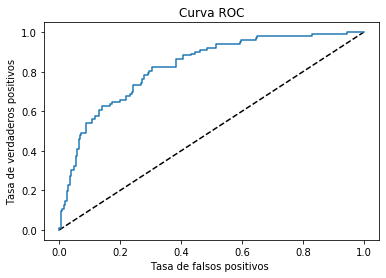

In [32]:
# Importamos la libreria necesaria
from sklearn.metrics import roc_curve

#  Calculamos las predicciones de las probabilidades del dataset de test
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generamos los valores necesario para la curva roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) # Primero los datos reales y luegos los pronosticados por el modelo

# Graficamos curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Tasa de falsos positivos ')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

Ahora vamos a calcular el area bajo la curva. AUC. (Modelos de clasificacion)

Mayor AUC es mejor

In [33]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5,
scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8260517799352751
AUC scores computed using 5-fold cross-validation: [0.80814815 0.80777778 0.82666667 0.87528302 0.83377358]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Ahora vamos a realizar Hyperparameter tuning



In [34]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7747644512350395


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Como resultado nos dio que:

`Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}`

`Best score is 0.7747644512350395`


Hyperparameter tuning utilizando RandomizedSearchCV

In [35]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 6}
Best score is 0.7448349036584331
